###### Credit EDA

In [1]:
#import the warnings.
import jovian
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing libraries usefull to work on EDA asigment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
#Reading client data for analysis
data_source=pd.read_csv(r'C:\Users\91701\Documents\Python\EDA_ass_case_study\application_data.csv')
data_source.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Basic Inspection of data

In [4]:
# Determining the shape of the datset

data_source.shape

(307511, 122)

In [5]:
data_source.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [7]:
#Checking number of columns with different datatypes
data_source.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

<b>Statiscal summary of numeric columns</b>

In [6]:
data_source.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


<blockquote>Seeing brief summary of columns we get to know that many columns have null values. Some of them have very high values as well-like Amount cols.<br>
    Next we will try to explore those null values for different columns.</blockquote>

<h2> Data Cleaning and Manupilation</h2>

<h4>Working with Null Values for different columns</h4>
<blockquote><b>Task 1:</b> Getting columns with null values more than 50%.<br>
    <b>Task 2:</b> Dropping those identified columns from original data set.</blockquote>

In [8]:
#Getting percentage of null values for top 60 columns in data set
(data_source.isnull().sum()/len(data_source)*100).sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

Since we have many columns having null values more than 50%, so we will work on dropping those columns.
Taking 50% as threshold because if for some data we do not have half of the records,than they are not quite usefull in analysis.

In [9]:
#Getting columns with null values more than 50 percent
na_col=data_source.isnull().sum()
na_col=na_col[na_col.values>(0.5*len(data_source))]
na_col

OWN_CAR_AGE                 202929
EXT_SOURCE_1                173378
APARTMENTS_AVG              156061
BASEMENTAREA_AVG            179943
YEARS_BUILD_AVG             204488
COMMONAREA_AVG              214865
ELEVATORS_AVG               163891
ENTRANCES_AVG               154828
FLOORSMIN_AVG               208642
LANDAREA_AVG                182590
LIVINGAPARTMENTS_AVG        210199
LIVINGAREA_AVG              154350
NONLIVINGAPARTMENTS_AVG     213514
NONLIVINGAREA_AVG           169682
APARTMENTS_MODE             156061
BASEMENTAREA_MODE           179943
YEARS_BUILD_MODE            204488
COMMONAREA_MODE             214865
ELEVATORS_MODE              163891
ENTRANCES_MODE              154828
FLOORSMIN_MODE              208642
LANDAREA_MODE               182590
LIVINGAPARTMENTS_MODE       210199
LIVINGAREA_MODE             154350
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAREA_MODE          169682
APARTMENTS_MEDI             156061
BASEMENTAREA_MEDI           179943
YEARS_BUILD_MEDI    

In [10]:
#Using predefined function to drop required columns,with default as 50%
def removeNulls(dataframe,axis=1,percent=0.5):
    df1=dataframe.copy()
    ishape=df1.shape
    cols=df1.isnull().sum()/len(df1)
    cols=list(cols[cols.values>percent].index)
    df1.drop(labels=cols,axis=1,inplace=True)
    print('No of columns dropped ', len(cols))
    print('Original datset shape:',ishape)
    print("New dataset shape:",df1.shape)
    return df1
    

In [11]:
data_source=removeNulls(data_source,axis=1,percent=0.5)

No of columns dropped  41
Original datset shape: (307511, 122)
New dataset shape: (307511, 81)


In [12]:
#Dataset after dropping few columns is
data_source.shape

(307511, 81)

<blockquote><b>Task 3:</b> Further checking for any irrelevent columns.</blockquote>

In [13]:
#Checking what all columns left with missing values now
(data_source.isnull().sum()/len(data_source)*100).sort_values(ascending=False).head(27)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

Observing above few columns with null values more than 45% too can be dropped, as those columns do not seem usefull in analysing patterns for defaulters 

In [14]:
#Dropping other irrelevant columns having nullvalue percentage more than 45%
data_source=removeNulls(data_source,axis=1,percent=0.45)

No of columns dropped  8
Original datset shape: (307511, 81)
New dataset shape: (307511, 73)


In [15]:
#Checking what all columns left with missing values now
(data_source.isnull().sum()/len(data_source)*100).sort_values(ascending=False).head(27)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000


<h4>Imputing Null Values</h4>
<blockquote>We saw above that for 8 columns we have null values more than 1%, will work on imputing those null values.</blockquote>

Working on Occupation_type column

In [16]:
#Checking percentage count of different occupation types, to decide on imputing null value
data_source['OCCUPATION_TYPE'].value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

In [12]:
# Checking the columns having less null percentage

df.isnull().sum()/len(df)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


Being categorical column the null values should be imputed with mode value. <br>Though Labourers have highest percentage with 26%, followed by sales staff 15.2%, none category is standing out so as to replace that for null values. <br> We will give another category as 'unknown' for nulls.

In [18]:
#Imputing nullvalues with 'unknown'
data_source['OCCUPATION_TYPE']=data_source['OCCUPATION_TYPE'].fillna('unknown')

In [19]:
data_source['OCCUPATION_TYPE'].isna().sum()

0

In [20]:
data_source[["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.899974,0.265474,0.267395,0.034362,0.007000,0.006402
std,1.869295,0.794056,0.916002,0.204685,0.110757,0.083849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,261.000000,27.000000,8.000000,9.000000,4.000000


The above 6 columns represent number of enquiries made for client,which should be discreet values and not continuous(which can be observed from above as well).So being discreet we will not impute those missing values with mean(being decimal value) instead with mode i.e. 0 considering no enquiries made during time  reflecting null rows. We can also choose median as its a discreet value in this case too.


In [21]:
#Creating a variable containing these columns to impute them in one go using the variable
enq_bur = ["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]

In [22]:
#Replacing null with median value
data_source.fillna(data_source[enq_bur].median(),inplace=True)

In [23]:
(data_source.isnull().sum()/len(data_source)*100).sort_values(ascending=False).head(27)

EXT_SOURCE_3                  19.825307
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_10               0.000000
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_7                0.000000
FLAG_DOCUMENT_8                0.000000
FLAG_DOCUMENT_9                0.000000
SK_ID_CURR                     0.000000
FLAG_DOCUMENT_11               0.000000
FLAG_DOCUMENT_20               0.000000
AMT_REQ_CREDIT_BUREAU_QRT      0.000000
AMT_REQ_CREDIT_BUREAU_MON      0.000000


In [24]:
data_source.isna().sum().sort_values(ascending=False)

EXT_SOURCE_3                   60965
NAME_TYPE_SUITE                 1292
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
                               ...  
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
TARGET                             0
AMT_REQ_CREDIT_BUREAU_YEAR         0
Length: 73, dtype: int64

For columns 'DAYS_LAST_PHONE_CHANGE' and  'CNT_FAM_MEMBER' missing value count is quite less 1 and 2 respectively, so we can drop the complete rows, as dropping few records would not affect our analysis when we have such large amount of data(307511 records).

In [27]:
#Removing rows with null value in 'DAYS_LAST_PHONE_CHANGE' column
data_source=data_source[~data_source['DAYS_LAST_PHONE_CHANGE'].isnull()]

In [29]:
data_source[data_source['DAYS_LAST_PHONE_CHANGE'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [30]:
#Removing rows with null value in 'CNT_FAM_MEMBERS' column
data_source=data_source[~data_source['CNT_FAM_MEMBERS'].isnull()]

In [31]:
data_source[data_source['CNT_FAM_MEMBERS'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [32]:
data_source.isnull().sum().sort_values(ascending=False).head(27)

EXT_SOURCE_3                  60963
NAME_TYPE_SUITE                1290
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    659
AMT_GOODS_PRICE                 276
AMT_ANNUITY                      12
FLAG_DOCUMENT_4                   0
FLAG_DOCUMENT_8                   0
FLAG_DOCUMENT_7                   0
FLAG_DOCUMENT_6                   0
FLAG_DOCUMENT_5                   0
SK_ID_CURR                        0
FLAG_DOCUMENT_3                   0
FLAG_DOCUMENT_2                   0
FLAG_DOCUMENT_10                  0
DAYS_LAST_PHONE_CHANGE            0
FLAG_DOCUMENT_9                   0
FLAG_DOCUMENT_12                  0
FLAG_DOCUMENT_11                  0
FLAG_DOCUMENT_20                  0
AMT_REQ_CREDIT_BUREAU_QRT         0
AMT_REQ_CREDIT_BUREAU_MON         0
AMT_REQ_CREDIT_BUREAU_WEEK        0
AMT_REQ_CREDIT_BUREAU_DAY         0
dtype: int64

In [33]:
#Lets try and analyse 'amt_annuity' col for imputing null values
data_source['AMT_ANNUITY'].describe()

count    307496.000000
mean      27108.549241
std       14493.802393
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

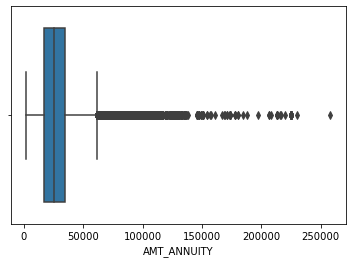

In [34]:
#Being continous column will check for any outliers
sns.boxplot(data=data_source,x='AMT_ANNUITY')
plt.show()

In [35]:
## So, 'AMT_ANNUITY' columns is having very few null values rows. Hence let's try to impute the missing values
## Since this column is having an outlier which is very large it will be inappropriate to fill those missing values with mean,
## Hence Median comes to rescue for this and we will fill those missing banks with median value
## Filling missing values with median
data_source['AMT_ANNUITY']=data_source['AMT_ANNUITY'].fillna(data_source['AMT_ANNUITY'].median())

In [37]:
data_source.isnull().sum().sort_values(ascending=False).head(27)

EXT_SOURCE_3                  60963
NAME_TYPE_SUITE                1290
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    659
AMT_GOODS_PRICE                 276
SK_ID_CURR                        0
FLAG_DOCUMENT_5                   0
FLAG_DOCUMENT_8                   0
FLAG_DOCUMENT_7                   0
FLAG_DOCUMENT_6                   0
FLAG_DOCUMENT_2                   0
FLAG_DOCUMENT_4                   0
FLAG_DOCUMENT_3                   0
FLAG_DOCUMENT_10                  0
DAYS_LAST_PHONE_CHANGE            0
FLAG_DOCUMENT_9                   0
FLAG_DOCUMENT_12                  0
FLAG_DOCUMENT_11                  0
FLAG_DOCUMENT_20                  0
AMT_REQ_CREDIT_BUREAU_QRT         0
AMT_REQ_CREDIT_BUREAU_MON         0
AMT_REQ_CREDIT_BUREAU_WEEK        0
AMT_REQ_CREDIT_BUREAU_DAY         0
AMT_REQ_CREDIT_BUREAU_HOUR        0
dtype: int64

In [38]:
#Since'AMT_GOODS_PRICE' is a continous column checking for outliers before imputation.
data_source['AMT_GOODS_PRICE'].describe()

count    3.072320e+05
mean     5.383971e+05
std      3.694467e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

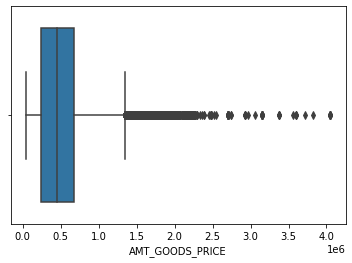

In [39]:
sns.boxplot(data_source['AMT_GOODS_PRICE'])
plt.show()

In [40]:
#Since we have outliers for the column so imputing missing values with median value
data_source['AMT_GOODS_PRICE']=data_source['AMT_GOODS_PRICE'].fillna(data_source['AMT_GOODS_PRICE'].median())

In [41]:
data_source.isnull().sum().sort_values(ascending=False).head(27)

EXT_SOURCE_3                  60963
NAME_TYPE_SUITE                1290
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    659
SK_ID_CURR                        0
FLAG_DOCUMENT_4                   0
FLAG_DOCUMENT_8                   0
FLAG_DOCUMENT_7                   0
FLAG_DOCUMENT_6                   0
FLAG_DOCUMENT_5                   0
DAYS_LAST_PHONE_CHANGE            0
FLAG_DOCUMENT_3                   0
FLAG_DOCUMENT_2                   0
FLAG_DOCUMENT_10                  0
ORGANIZATION_TYPE                 0
FLAG_DOCUMENT_9                   0
FLAG_DOCUMENT_11                  0
REG_CITY_NOT_WORK_CITY            0
FLAG_DOCUMENT_20                  0
AMT_REQ_CREDIT_BUREAU_QRT         0
AMT_REQ_CREDIT_BUREAU_MON         0
AMT_REQ_CREDIT_BUREAU_WEEK        0
AMT_REQ_CREDIT_BUREAU_DAY         0
AMT_REQ_CREDIT_BUREAU_HOUR        0
dtype: int64

In [42]:
(data_source.isnull().sum()/len(data_source)*100).sort_values(ascending=False).head(27)

EXT_SOURCE_3                  19.824850
NAME_TYPE_SUITE                0.419501
OBS_30_CNT_SOCIAL_CIRCLE       0.332024
DEF_30_CNT_SOCIAL_CIRCLE       0.332024
OBS_60_CNT_SOCIAL_CIRCLE       0.332024
DEF_60_CNT_SOCIAL_CIRCLE       0.332024
EXT_SOURCE_2                   0.214303
SK_ID_CURR                     0.000000
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_8                0.000000
FLAG_DOCUMENT_7                0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_5                0.000000
DAYS_LAST_PHONE_CHANGE         0.000000
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_10               0.000000
ORGANIZATION_TYPE              0.000000
FLAG_DOCUMENT_9                0.000000
FLAG_DOCUMENT_11               0.000000
REG_CITY_NOT_WORK_CITY         0.000000
FLAG_DOCUMENT_20               0.000000
AMT_REQ_CREDIT_BUREAU_QRT      0.000000
AMT_REQ_CREDIT_BUREAU_MON      0.000000
AMT_REQ_CREDIT_BUREAU_WEEK     0.000000


<b>Dealing with Code_gender column</b><br>
We have observed that for some columns values mentioned is 'XNA', which is equivalant to Non Available. Will find those rows and columns and apply suitable techniques to get rid of them.

In [43]:
#Take a look at 'CODE_GENDER' column, being an important categorical variable for our analysis,
#no useless values shuld be present to hamper the inferences.
data_source['CODE_GENDER'].value_counts()

F      202447
M      105057
XNA         4
Name: CODE_GENDER, dtype: int64

Total rows in dataset is more than 3 lakhs and removing 4 rows from this would not make any effect in our analysis. So to get rid of unwanted gender values in 'CODE_GENDER' column we will remove those 4 records to clean our data.

In [44]:
data_source=data_source[data_source['CODE_GENDER']!='XNA']

In [54]:
data_source['CODE_GENDER'].value_counts()

F    202447
M    105057
Name: CODE_GENDER, dtype: int64

<b>Checking datatype of columns</b>

In [46]:
data_source['DAYS_REGISTRATION'].value_counts()

-1.0        113
-7.0         98
-6.0         96
-4.0         92
-2.0         92
           ... 
-15488.0      1
-15327.0      1
-16492.0      1
-14190.0      1
-15844.0      1
Name: DAYS_REGISTRATION, Length: 15688, dtype: int64

In [47]:
#Analysing  float columns for disrepent datatype
data_source.select_dtypes(include='float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [48]:
cols_to_convert=['DAYS_REGISTRATION','CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_HOUR', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [49]:
data_source.loc[:, cols_to_convert]=data_source.loc[:, cols_to_convert].apply(lambda col:col.astype('int64', errors='ignore'))

In [50]:
data_source.info('all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307504 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307504 non-null  int64  
 1   TARGET                       307504 non-null  int64  
 2   NAME_CONTRACT_TYPE           307504 non-null  object 
 3   CODE_GENDER                  307504 non-null  object 
 4   FLAG_OWN_CAR                 307504 non-null  object 
 5   FLAG_OWN_REALTY              307504 non-null  object 
 6   CNT_CHILDREN                 307504 non-null  int64  
 7   AMT_INCOME_TOTAL             307504 non-null  float64
 8   AMT_CREDIT                   307504 non-null  float64
 9   AMT_ANNUITY                  307504 non-null  float64
 10  AMT_GOODS_PRICE              307504 non-null  float64
 11  NAME_TYPE_SUITE              306214 non-null  object 
 12  NAME_INCOME_TYPE             307504 non-null  object 
 13 


<h4>Derived Metrices</h4><br>
Performing binning analysis on few continuous<b>(amt_income_total,amt_credit and amt_goods_price')</b> variables. We will derive categorical columns out of these continous columns for better understanding in deriving insights. As range of values are always usefull in comparable analysis than any discreet values.<br>
1. Bin 'AMT_INCOME_TOTAL' columns


In [55]:
data_source['AMT_INCOME_TOTAL'].value_counts()

135000.0    35749
112500.0    31019
157500.0    26555
180000.0    24719
90000.0     22483
            ...  
83479.5         1
44955.0         1
78916.5         1
37008.0         1
131125.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64

In [56]:
# Creating bins for income amount in term of Lakhs
data_source['AMT_INCOME_TOTAL']=data_source['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-1L','1L-2L','2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

data_source['INCOME_RANGE']=pd.cut(data_source['AMT_INCOME_TOTAL'],bins,labels=slot)

In [57]:
data_source['INCOME_RANGE'].value_counts()


1L-2L        155895
2L-3L         65173
0-1L          63698
3L-4L         14676
4L-5L          5360
5L-6L          1095
6L-7L           869
8L-9L           298
7L-8L           162
9L-10L           28
10L Above        18
Name: INCOME_RANGE, dtype: int64

In [58]:
#Inspecting if new col values are added to dataset.
data_source[['AMT_INCOME_TOTAL','INCOME_RANGE']].head()

,AMT_INCOME_TOTAL,INCOME_RANGE
0,2.025,2L-3L
1,2.700,2L-3L
2,0.675,0-1L
3,1.350,1L-2L
4,1.215,1L-2L


In [59]:
# Creating bins for credit amount in terms of Lakhs
data_source['AMT_CREDIT']=data_source['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-1L','1L-2L','2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

data_source['CREDIT_RANGE']=pd.cut(data_source['AMT_CREDIT'],bins,labels=slot)

In [60]:
data_source["CREDIT_RANGE"].value_counts(normalize = True)*100

2L-3L        20.229866
5L-6L        12.633747
4L-5L        11.824346
1L-2L        11.124193
3L-4L         9.720566
6L-7L         8.875733
8L-9L         8.043079
7L-8L         7.083830
10L Above     4.953846
9L-10L        3.294813
0-1L          2.215981
Name: CREDIT_RANGE, dtype: float64

In [61]:
# Creating bins for Price of Goods in term of Lakhs
data_source['AMT_GOODS_PRICE']=data_source['AMT_GOODS_PRICE']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

data_source['GOODS_PRICE_RANGE']=pd.cut(data_source['AMT_GOODS_PRICE'],bins=bins,labels=slots)

In [62]:
data_source['GOODS_PRICE_RANGE'].value_counts()

2L-3L        62758
4L-5L        57249
6L-7L        40024
10L Above    34119
1L-2L        32956
8L-9L        21483
3L-4L        21218
5L-6L        13117
0-1L          8709
7L-8L         8110
9L-10L        7761
Name: GOODS_PRICE_RANGE, dtype: int64

<b>Dealing with days columns having negative values.</b>

In [64]:
days_col = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]

data_source[days_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307504.000000,307504.000000,307504.000000,307504.000000,307504.000000
mean,-16037.073765,63816.557277,-4986.148632,-2994.207679,-962.861833
std,4363.974220,141277.018555,3522.893528,1509.453373,826.813977
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000,-4292.000000
25%,-19682.000000,-2760.000000,-7480.000000,-4299.000000,-1570.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000,-757.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000,-274.000000
max,-7489.000000,365243.000000,0.000000,0.000000,0.000000


Values are comming out to be negative which is not very usual, so we will take absolute for these columns to make them realistic.

In [65]:
data_source[days_col]=abs(data_source[days_col])

In [66]:
data_source[days_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307504.000000,307504.000000,307504.000000,307504.000000,307504.000000
mean,16037.073765,67726.225139,4986.148632,2994.207679,962.861833
std,4363.974220,139444.991702,3522.893528,1509.453373,826.813977
min,7489.000000,0.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000,274.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000,757.000000
75%,19682.000000,5707.000000,7480.000000,4299.000000,1570.000000
max,25229.000000,365243.000000,24672.000000,7197.000000,4292.000000


<b>Age of clients can be usefull in deriving insights for defaulters, we are adding new column to dataset for age group deriving from 'days_birth' column.<br></b>
    <b>Also will also add new column for days_employed to represent that in years as well.</b>


In [67]:
data_source['AGE_YRS']=data_source['DAYS_BIRTH']//365

In [68]:
data_source['AGE_YRS'].describe()

count    307504.000000
mean         43.436183
std          11.954554
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE_YRS, dtype: float64

In [69]:
#Age of clients ranges from 20 yrs to 69 yrs, so categorising age into diff groups ranfing from 20 to 70
data_source['AGE_GROUP']=pd.cut(data_source['AGE_YRS'],bins=np.arange(20,71,5))

In [70]:
data_source['AGE_GROUP'].value_counts()

(35, 40]    43679
(40, 45]    39997
(30, 35]    39435
(25, 30]    36486
(50, 55]    35096
(45, 50]    34404
(55, 60]    32722
(60, 65]    24359
(20, 25]    16316
(65, 70]     5009
Name: AGE_GROUP, dtype: int64

In [71]:
#Dealing with days_employed column
data_source['EMPLOYE_YRS']=data_source['DAYS_EMPLOYED']//365


In [72]:
data_source['EMPLOYE_YRS'].describe()

count    307504.000000
mean        185.025583
std         381.975587
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: EMPLOYE_YRS, dtype: float64

In [73]:
#Binning of employed days
bins = [0,5,10,15,20,25,30,50]
slots = ["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"]

data_source["EMPLOY_YEARS_GROUP"] = pd.cut(data_source['EMPLOYE_YRS'], bins=bins, labels=slots)

In [74]:
data_source["EMPLOY_YEARS_GROUP"].value_counts(normalize=True)

0-5         0.555827
5-10        0.249661
10-15       0.102253
15-20       0.043393
20-25       0.024373
25-30       0.013125
30 Above    0.011368
Name: EMPLOY_YEARS_GROUP, dtype: float64

<h3>Study Outliers</h3>

In [75]:
data_source.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YRS,EMPLOYE_YRS
count,307504.000000,307504.000000,307504.000000,307504.000000,307504.000000,307504.000000,307504.000000,307504.000000,307504.000000,307504.000000,...,307504.000000,307504.000000,307504.000000,307504.000000,307504.000000,307504.000000,307504.000000,307504.000000,307504.000000,307504.000000
mean,278182.341648,0.080731,0.417051,1.687968,5.990294,27108.556046,5.383193,0.020868,16037.073765,67726.225139,...,0.000507,0.000335,0.005538,0.006055,0.029723,0.231288,0.229633,1.778448,43.436183,185.025583
std,102789.940528,0.272421,0.722121,2.371252,4.024941,14493.587200,3.692911,0.013831,4363.974220,139444.991702,...,0.022518,0.018299,0.078015,0.103038,0.190730,0.856805,0.744065,1.765519,11.954554,381.975587
min,100002.000000,0.000000,0.000000,0.256500,0.450000,1615.500000,0.405000,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,189148.500000,0.000000,0.000000,1.125000,2.700000,16524.000000,2.385000,0.010006,12413.000000,933.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34.000000,2.000000
50%,278203.500000,0.000000,0.000000,1.471500,5.135310,24903.000000,4.500000,0.018850,15750.000000,2219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.000000,6.000000
75%,367144.250000,0.000000,1.000000,2.025000,8.086500,34596.000000,6.795000,0.028663,19682.000000,5707.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.000000,15.000000
max,456255.000000,1.000000,19.000000,1170.000000,40.500000,258025.500000,40.500000,0.072508,25229.000000,365243.000000,...,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.000000,1000.000000


In [76]:
out_col=["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
               "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION"]

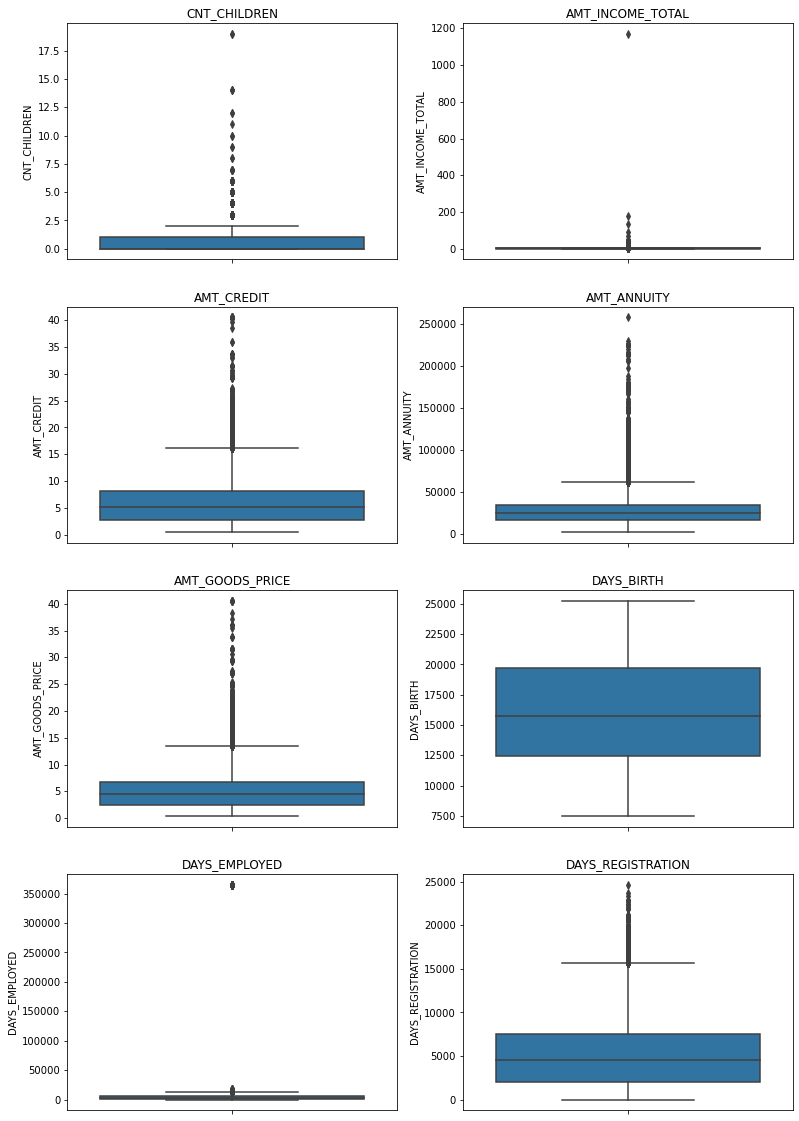

In [77]:
import itertools #Importing itertools for easy subplotting
plt.figure(figsize=[13,20])
for i,j in itertools.zip_longest(out_col, range(len(out_col))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = data_source[i], orient = "h")
   
    plt.title(i, fontsize=12)

<blockquote>It can be seen that in current application data<br>
    <b>1.</b>AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.<br>
    <b>2.</b>AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have comparatively high income to others.<br>
    <b>3.</b>DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.</blockquote>

<h3>Checking for Imbalance in TARGET Variable</h3>

In [78]:
data_source.TARGET.value_counts(normalize=True)*100


0    91.926934
1     8.073066
Name: TARGET, dtype: float64

###### The Imbalance ratio is 10.55



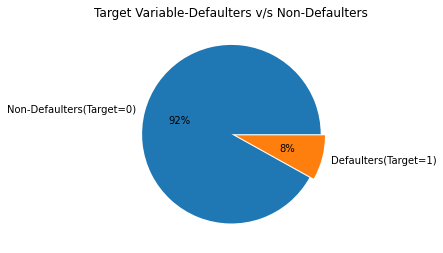

In [79]:
labels=['Non-Defaulters(Target=0)','Defaulters(Target=1)']
colors = sns.color_palette('pastel')
plt.figure(figsize=[4,6])
plt.pie(data_source.TARGET.value_counts(normalize=True)*100, labels = labels, explode=(0,0.05) ,autopct='%.0f%%')
plt.title('Target Variable-Defaulters v/s Non-Defaulters')
plt.show()

<blockquote>This pie plot clearly shows we have very low percentage of defaulters in our data i.e.8% as opposed to 92% of non-defaulters.<br>
    There is high imbalance between people who defaulted and who did not.</blockquote>

In [80]:
data_source['CODE_GENDER'].value_counts(normalize=True)

F    0.658356
M    0.341644
Name: CODE_GENDER, dtype: float64

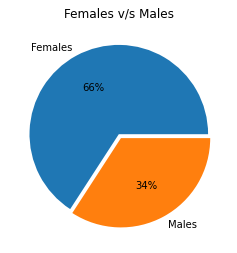

In [81]:
labels=['Females','Males']
colors = sns.color_palette('pastel')
plt.figure(figsize=[4,6])
plt.pie(data_source['CODE_GENDER'].value_counts(normalize=True)*100, labels = labels, explode=(0,0.05) ,autopct='%.0f%%')
plt.title('Females v/s Males', loc='center', pad=None)
plt.show()

In [82]:
#Before stepping into uni and bi-variate analysis we first have a finaldatset with only few most important 
#columns impacting target variable the most. This is done to simplfy our further analysis.
req_cols=['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION','OCCUPATION_TYPE','ORGANIZATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','FLAG_DOCUMENT_3','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'INCOME_RANGE', 'CREDIT_RANGE', 'GOODS_PRICE_RANGE', 'AGE_YRS', 'AGE_GROUP', 'EMPLOYE_YRS', 'EMPLOY_YEARS_GROUP' ]

In [83]:
data_source.shape

(307504, 80)

In [85]:
app_train=data_source[req_cols]

In [86]:
app_train.shape

(307504, 38)

Basing our analysis on TARGET variable i.e. DEFAULTER or NON-DEFAULTER, we will divide the dataset among two dataframes to inspect outcome of both values for each variable.

In [87]:
app_train0=app_train[app_train['TARGET']==0]

In [88]:
app_train1=app_train[app_train['TARGET']==1]

<h2>Univariate Analysis</h2>

<b><i>Performing Univariate analysis on Categorical columns.</i></b> 

In [90]:
def uniVarPlot(col,hue=None):

    sns.set_style('ticks')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.countplot(x=col, data=app_train0,ax=ax1,hue=hue)
    ax1.set_ylabel('Total Counts')
    ax1.set_title(f'Distribution of {col} for Non-Defaulters',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right",fontdict={'fontsize':13,'fontweight':4, 'color':'brown'})
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(app_train0))*100), (p.get_x()+0.1, p.get_height()+50),fontsize=13)
        
    sns.countplot(x=col, data=app_train1,ax=ax2,hue=hue)
    ax2.set_ylabel('Total Counts')
    ax2.set_title(f'Distribution of {col} for Defaulters',fontsize=15)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right",fontdict={'fontsize':13,'fontweight':4, 'color':'brown'})
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(app_train1))*100), (p.get_x()+0.1, p.get_height()+50),fontsize=13)
    
    plt.show()

<b>Univariate analysis on Unordered categorical columns</b>

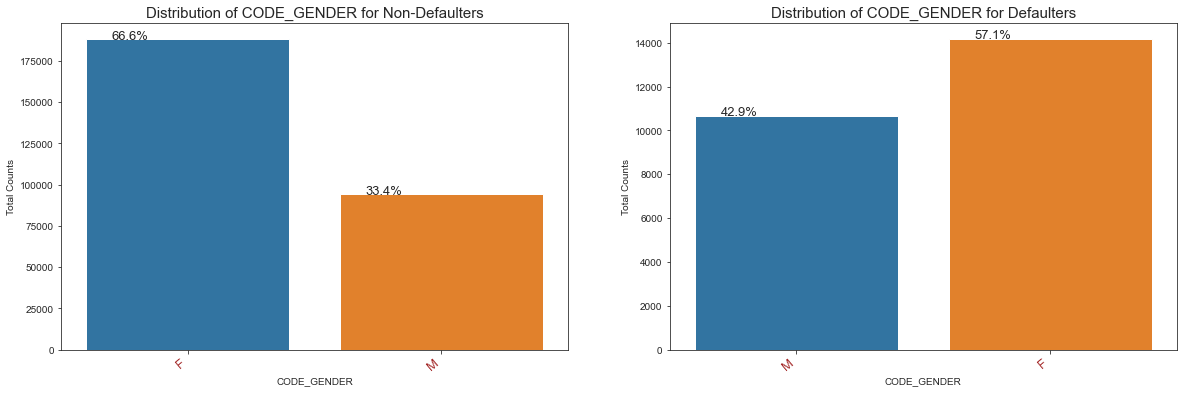

In [91]:
uniVarPlot('CODE_GENDER')

<blockquote>1.Total percentage of male clients are about 34%(as seen above pie plot), which is less than females.But Comparatively male defaulters are high--around 43% defaulters are males. <br>
    2. Similarly total females applying for loans are 66%, but their default percentage is less i.e. 57%,so females are less prone to default.

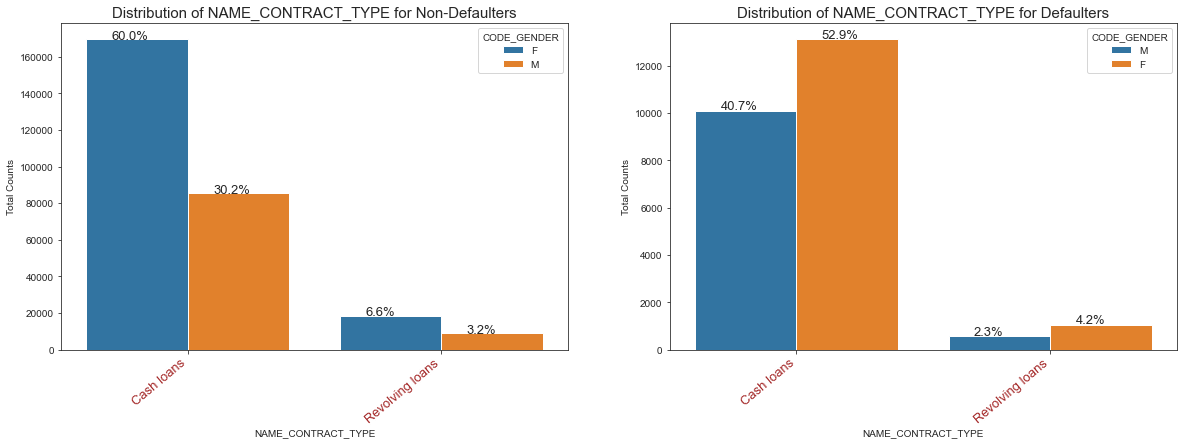

In [92]:
uniVarPlot('NAME_CONTRACT_TYPE',hue='CODE_GENDER')

<blockquote>1. Both males and females apply for cash loans more as compared to revolving loans.<br>
    2. On comparing we observe that, both genders default more on cash loans as compared to revolving loans.

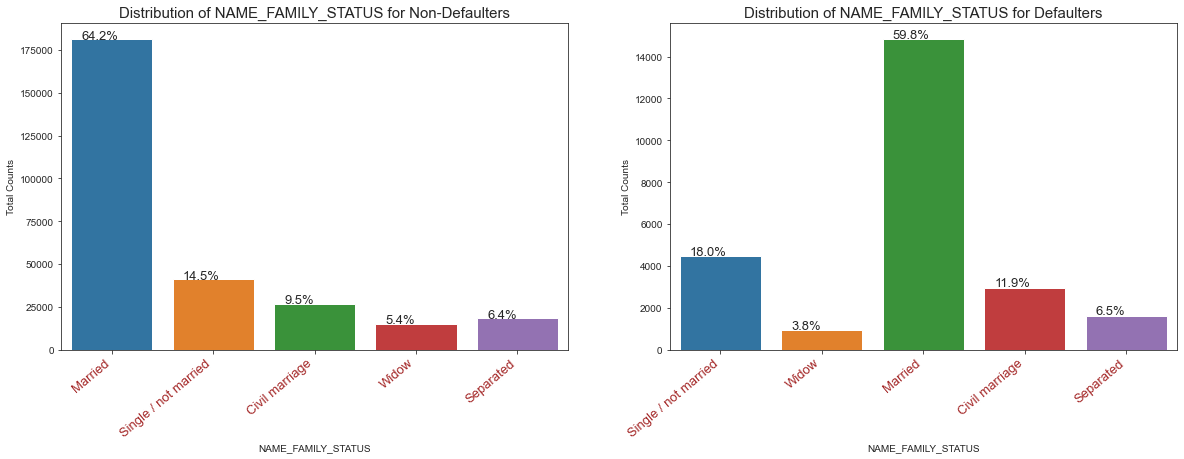

In [93]:
uniVarPlot('NAME_FAMILY_STATUS')

<blockquote>1. Married people apply for more loans and they have less defaults comparatively. They are followed by Single/not married<br>
    2. Single/non-married people are tend to default with 18% as opposed to 14.5% of non-defaults, so giving loan to these people can be bit risky. </blockquote>

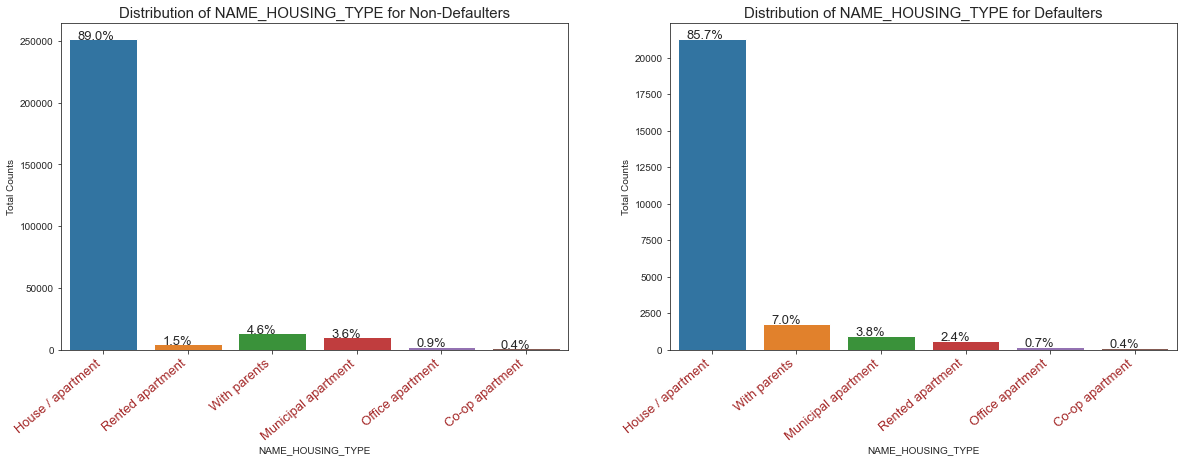

In [94]:
uniVarPlot('NAME_HOUSING_TYPE')

<blockquote>1.Majority of people aplying for loan lives in House/apartment, their default and non-default percentage is almost same<br>
2.People living in office apartments have lowest default rate<br>
3.People living with parents and living in rented apartments have higher probability of defaulting,</blockquote>

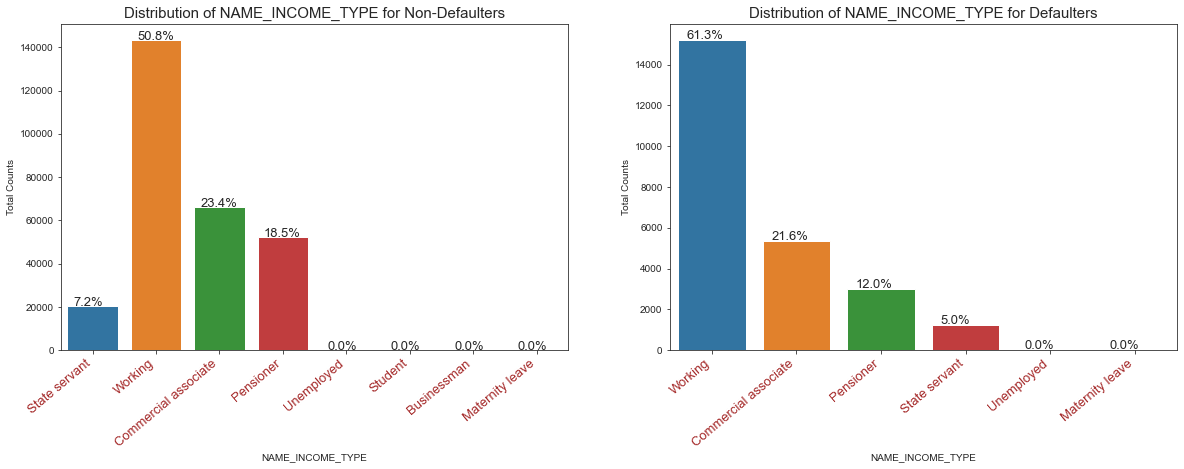

In [95]:
uniVarPlot('NAME_INCOME_TYPE')

<blockquote>1.Working class are the ones who apply for loans mostly, folowed by commercial associate,pensioner and state servant.<br>
    2.We have working class defaulters more comparatively , i.e. 61.3% as opposed to 50% non-defaults. <br>
    3.For loan approval company should rely more on Bussinessman and Studnet as we do not have any defaulters for them.

<b>Univariate analysis on ordered categorical columns</b>

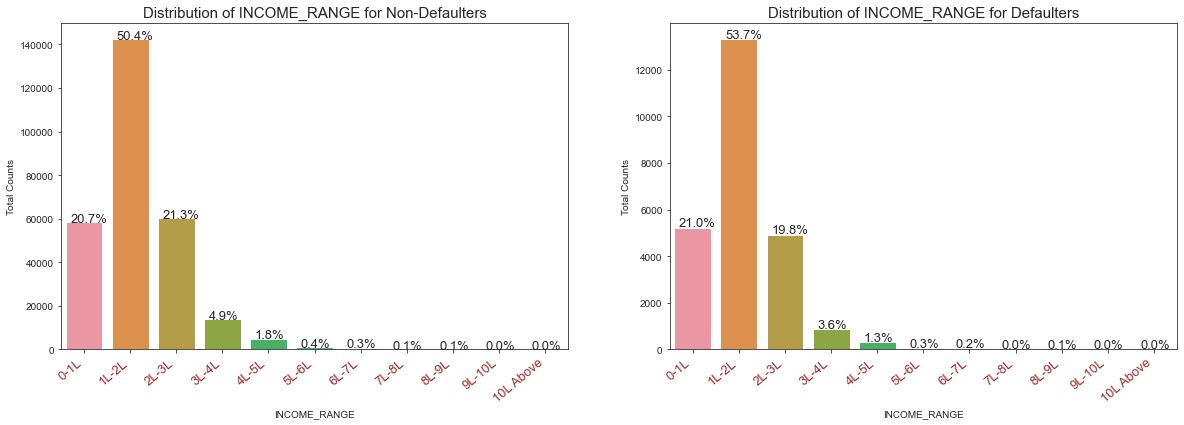

In [96]:
uniVarPlot('INCOME_RANGE')

<blockquote>1. Majority of people have total income less than 3 lakhs.<br>
    2.People with very high total incomes above 8 lakhs defaults almost 0. This is obvious, as people with good income do not generally face credit payment difficulties.<br>
    3.We have comparatively high prcentage of defaulters from people with total income less than 3 lakhs.</blockquote>

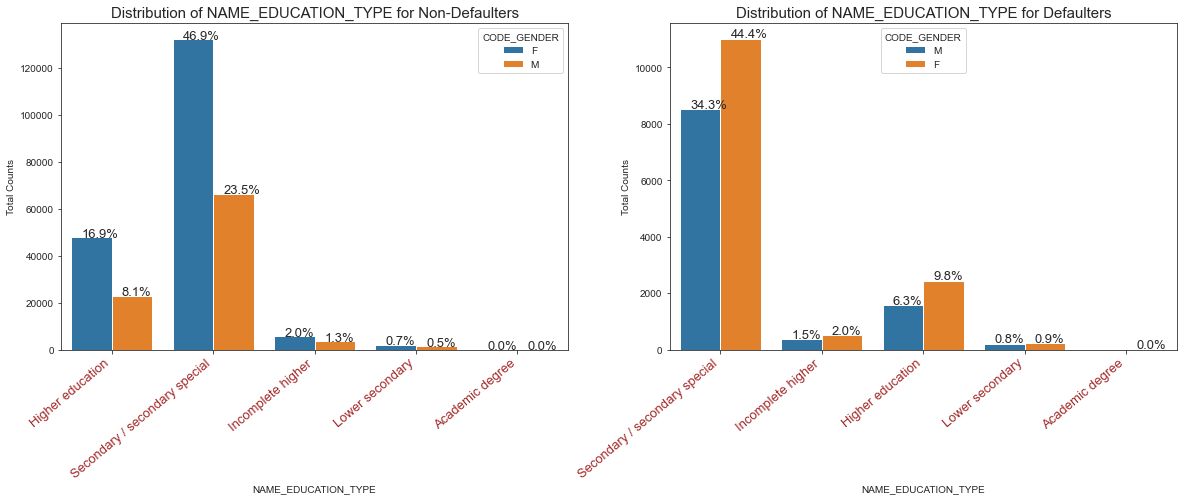

In [97]:
uniVarPlot('NAME_EDUCATION_TYPE',hue='CODE_GENDER')

<blockquote>1. Poeple with three education types-'incomplete higher', 'Lower secondary'  are equally likely to default while academic degree default is almost zero.<br>
    2. People applying loans with secondary/secondary special level of highest education tend to default more and with Higher education level tend to default  less(only 16.1 % as compared to 25.1% of non-defaults) comparatively</blockquote>

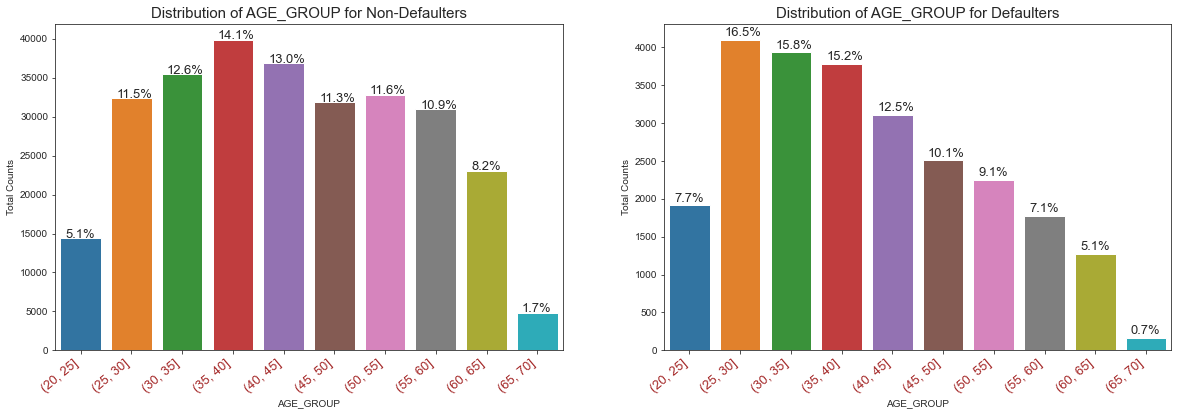

In [98]:
uniVarPlot('AGE_GROUP')

<blockquote>1.We can clearly see people between age group of 20 and 30 are tend to default(24.2%) quite high as compared to non-defaults(16.6%). This observation proves that single people default more as seen in above plots.<br>
    2.People above 45 age group are the ones who do not face much difficulties in paying credits, they can be trusted while approving loan application. Their default rate is quite less comparatively.</blockquote>

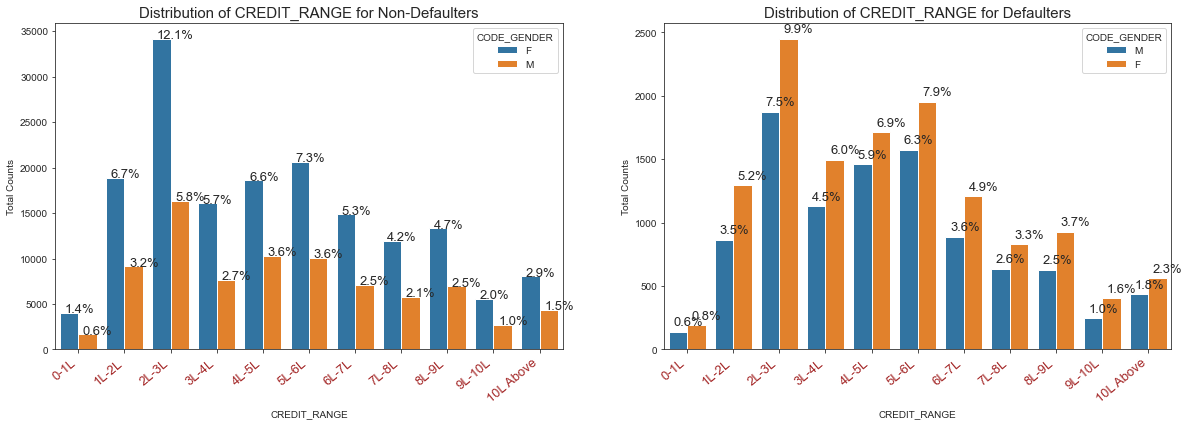

In [99]:
uniVarPlot('CREDIT_RANGE', hue='CODE_GENDER')

`<blockquote>1.There are high number of applicants have loan in range of 2-3 Lakhs followed by 5-6 lakhs range for both males and females.<br>
    2.Observing gender wise for every credit range male defaulter percentage is more than female defualters.<br>
    3.People with credit amounts ranging between 3 and 6 lakhs tend to default more,combining male/female percentage.

<h3>Univariate analysis for continuous columns</h3>

In [100]:
def univar_numerical(col):
    sns.set_style('ticks')
    sns.despine()
    #plt.rcParams["axes.labelsize"] = 12
    #plt.rcParams['axes.titlesize'] = 22
    #plt.rcParams['axes.titlepad'] = 30
    plt.figure(figsize=[20,6])
    plt.subplot(1,2,1)
    sns.distplot(app_train0[col],hist=False,label='NonDefault')
    sns.distplot(app_train1[col], hist=False,label='Default')
    plt.legend()
    plt.subplot(1,2,2)
    plt.hist(app_train0[col], alpha=0.5, label='NonDefault')
    plt.hist(app_train1[col], alpha=0.5, label='Default')
    plt.legend()
    
    plt.show()

In [101]:
num_col=['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_INCOME_TOTAL']

Distribution of AMT_CREDIT


<Figure size 432x288 with 0 Axes>

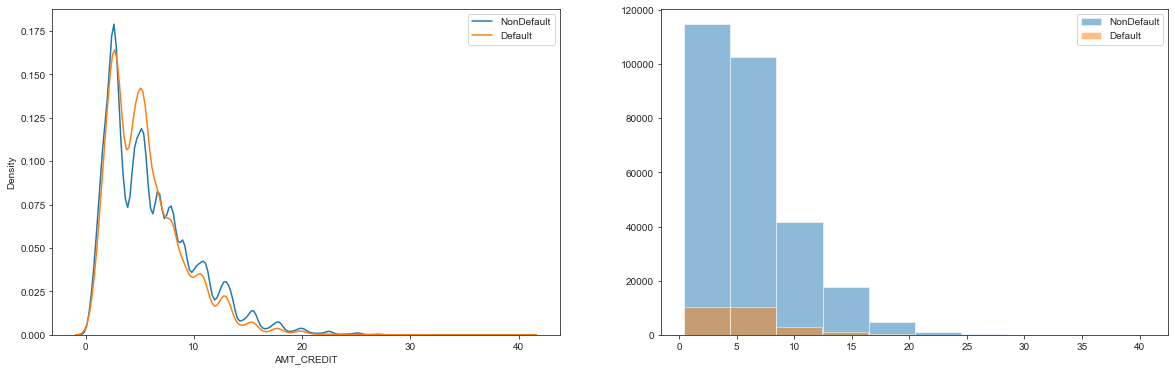

Distribution of AMT_ANNUITY


<Figure size 432x288 with 0 Axes>

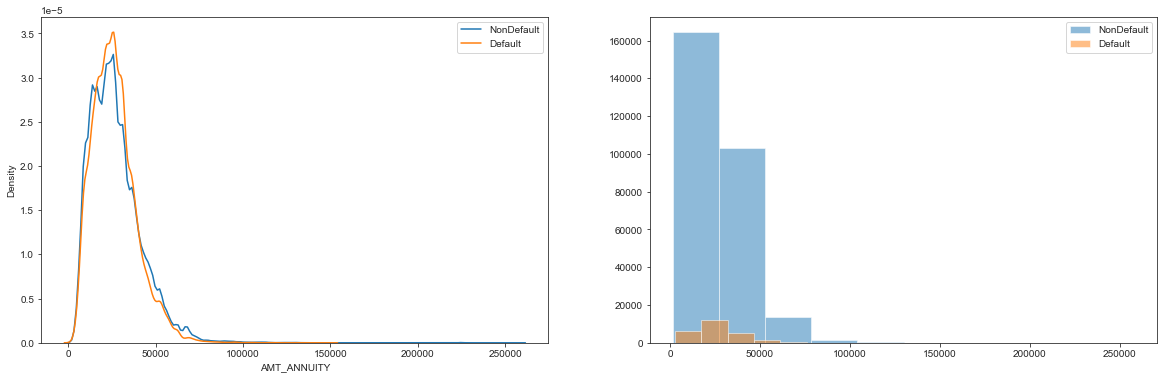

Distribution of AMT_GOODS_PRICE


<Figure size 432x288 with 0 Axes>

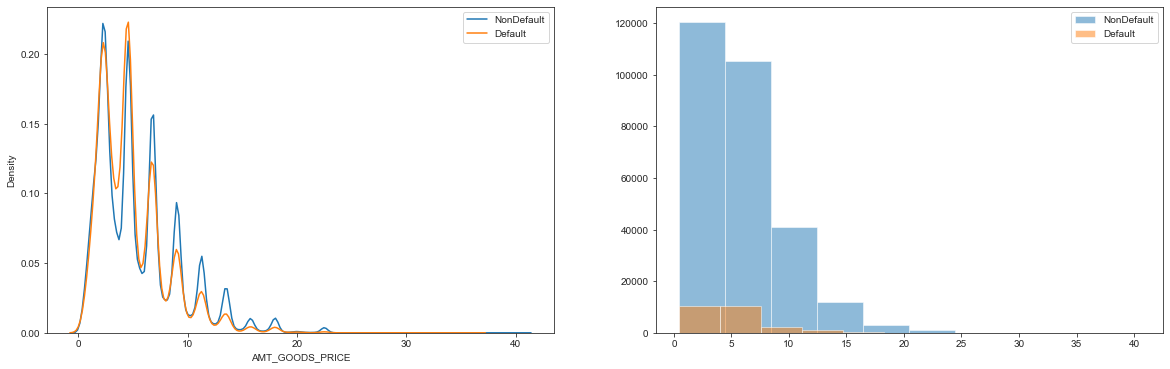

Distribution of AMT_INCOME_TOTAL


<Figure size 432x288 with 0 Axes>

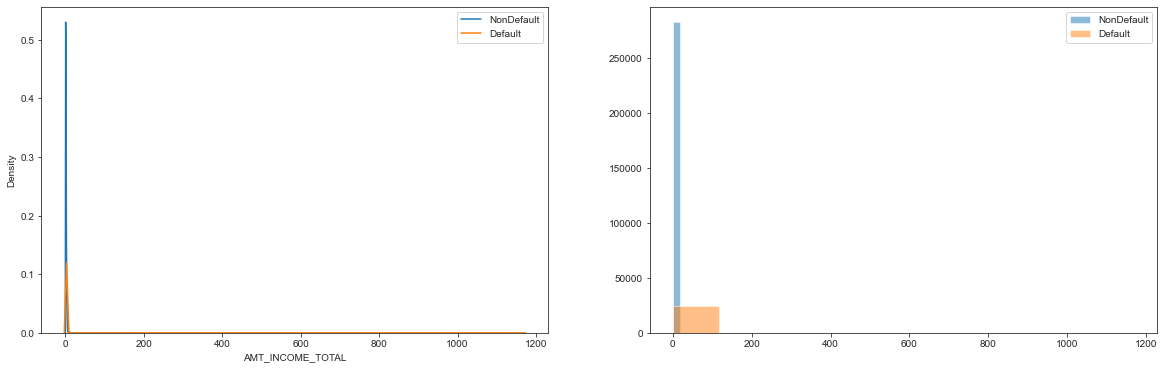

In [102]:
for col in num_col:
    title = "Distribution of "+col
    print(title)
    univar_numerical(col)
    

<blockquote>1. 'CREDIT_AMOUNT'--Loan is moslty taken for credit amounts less than 50 lakhs.<br>
    2. 'ANNUITY_AMOUNT'--Large number of people prefer to pay annuity amount below 50000.<br>
    3. 'GOODS_PRICE'-- Most number of loans are given for goods price more than 10lakhs<br>
    4. Observing results of above 4 columns(), we can conclude that for all 4 columns plots do overlap to an extent, giving not much clear insight as how default rate can be affected by these factors individually.<br>
    5. Specifically for total_income_amount, where the graph is highly skewed, almost overlap.<br></blockquote>

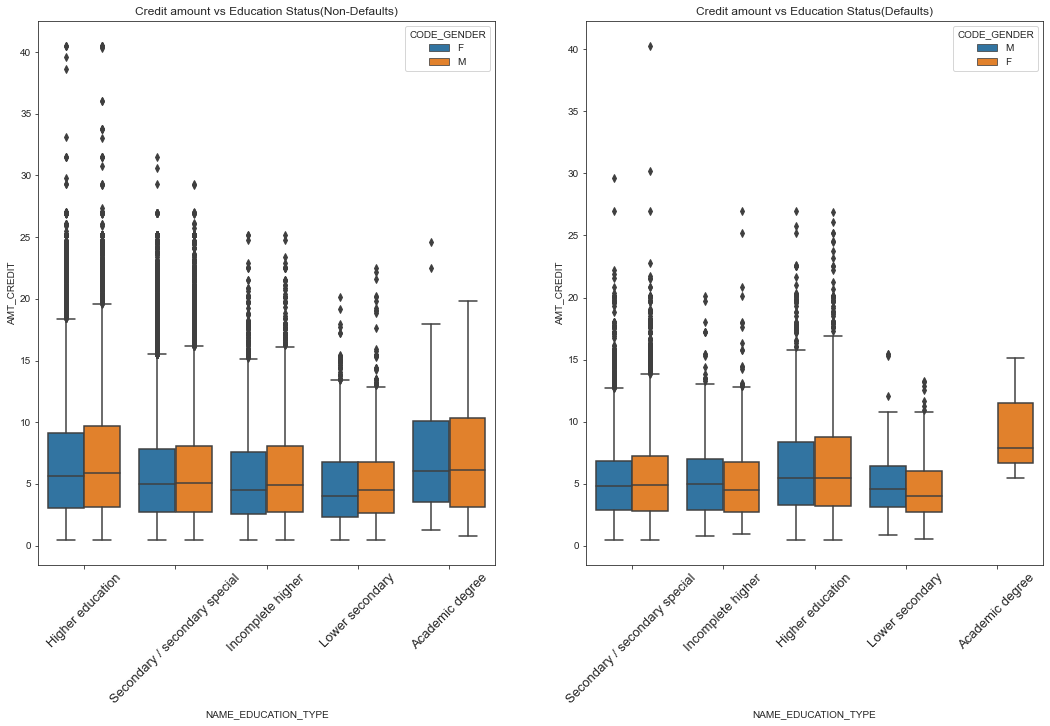

In [103]:
#Comapring credit amounts for both target variables on basis of education type with gender as hue.
plt.figure(figsize=[18,10])
plt.subplot(1,2,1)
plt.xticks(rotation=45,fontsize=13)
sns.boxplot(data =app_train0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue='CODE_GENDER')
plt.title('Credit amount vs Education Status(Non-Defaults)')
plt.subplot(1,2,2)
plt.xticks(rotation=45,fontsize=13)
sns.boxplot(data =app_train1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='CODE_GENDER')
plt.title('Credit amount vs Education Status(Defaults)')
plt.show()

<blockquote>1. An interesting observation from above plot(amnt_credit v/s edu_type),is that in Academic degree category we do not have any male defaulters. SO here we can bet on males with academic degre as highest education.<br>
    2.Females with Academic degree education face payment difficulties with high credit amount(min credit anount is comparatiely high with other types). Its quite high as compared to population in other education types.<br>
    3.Observing non-defaults, for academic category both males and females, more than 50% population have comparatively high credit amounts,with only 2 outliers in case of females.  Followed by higher education(wherin we have lot of outliers). 

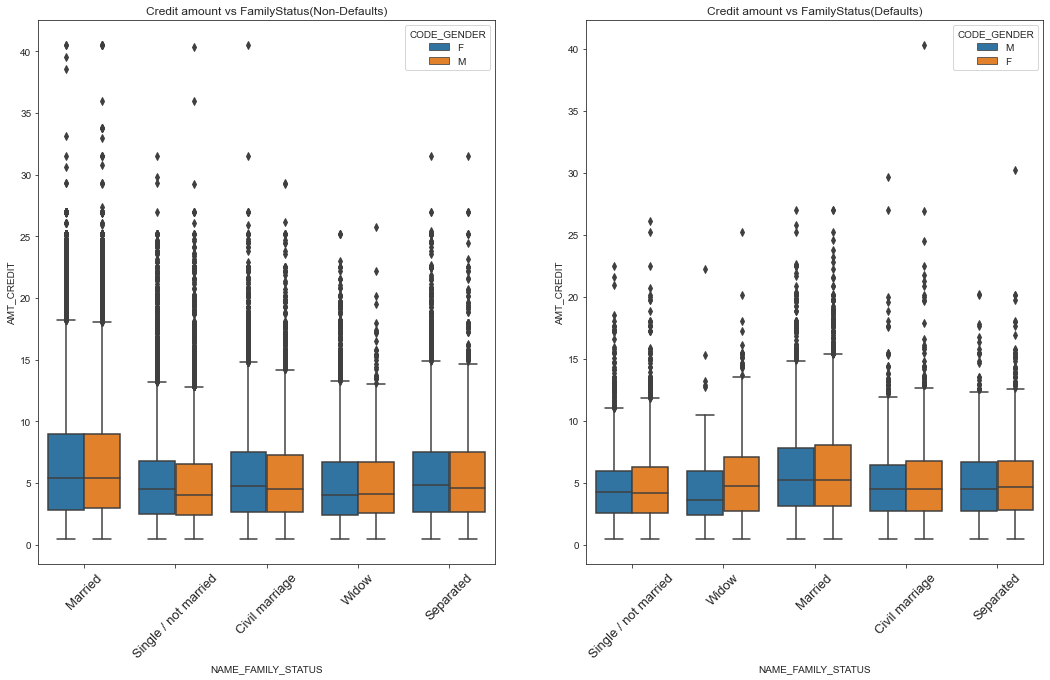

In [104]:
#Comapring credit amounts for both target variables on basis of Family status with gender as hue.
plt.figure(figsize=[18,10])
plt.subplot(1,2,1)
plt.xticks(rotation=45,fontsize=13)
sns.boxplot(data =app_train0, x='NAME_FAMILY_STATUS',y='AMT_CREDIT', hue='CODE_GENDER')
plt.title('Credit amount vs FamilyStatus(Non-Defaults)')
plt.subplot(1,2,2)
plt.xticks(rotation=45,fontsize=13)
sns.boxplot(data =app_train1, x='NAME_FAMILY_STATUS',y='AMT_CREDIT',hue='CODE_GENDER')
plt.title('Credit amount vs FamilyStatus(Defaults)')
#ticks=np.arange(0,5000000,1000000)
#labels=["{}M".format(i//1000000) for i in ticks]
#plt.yticks(ticks,labels)
plt.show()

<blockquote><b>1.</b>Credit amounts for few married males and females(the outliers) is high(more than 40lakhs) comparing with other categories. Even overall credit amounts range is more for married people.<br>
    <b>2.</b> An important observation is that we have outliers for credit amounts in all 5 categories, though they are bit less for defaults as compared to non-defaults. We can conclude that, credit amounts are comparatively less for people with payment difficulties.<br></blockquote>
     

<b>Between continuous cols</b>

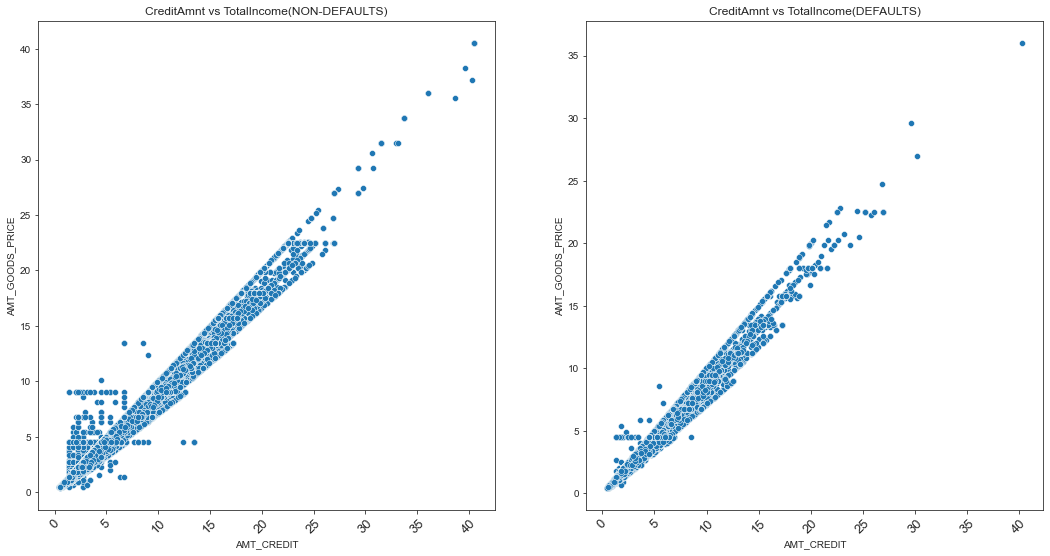

In [105]:
#Studying variation of credit amount on basis of totalincome
plt.figure(figsize=[18,9])
plt.subplot(1,2,1)
plt.xticks(rotation=45,fontsize=13)
sns.scatterplot(data =app_train0, x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('CreditAmnt vs TotalIncome(NON-DEFAULTS)')
plt.subplot(1,2,2)
plt.xticks(rotation=45,fontsize=13)
sns.scatterplot(data =app_train1, x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('CreditAmnt vs TotalIncome(DEFAULTS)')
plt.show()

<blockquote>1. Credit amount increases with increase in total income. Both variables are positively linearly dependent.<br>
    2. In case of defaulters there is one person inspite of are high income unable pay for high credit.

In [106]:
app_train0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'INCOME_RANGE', 'CREDIT_RANGE',
       'GOODS_PRICE_RANGE', 'AGE_YRS', 'AGE_GROUP', 'EMPLOYE_YRS',
       'EMPLOY_YEARS_GROUP'],
      dtype='object')

In [107]:
#Taking absolute value,because need to get top10 correlations, nothing specific 
#either positive or negative.
corr0=app_train0.corr()
corr0.drop('TARGET', axis=1,inplace=True)
corr0.drop('TARGET', axis=0,inplace=True)

In [108]:
corr0

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,CNT_FAM_MEMBERS,...,REGION_RATING_CLIENT_W_CITY,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YRS,EMPLOYE_YRS
SK_ID_CURR,1.000000,-0.000710,0.001747,-0.000353,0.000064,-0.000250,0.001334,0.001735,0.001473,-0.002779,...,-0.000731,-0.003247,-0.001775,-0.001627,0.002295,-0.000027,0.000956,0.003851,0.001306,0.001733
CNT_CHILDREN,-0.000710,1.000000,0.027407,0.003086,0.020918,-0.000551,-0.336976,-0.245178,-0.185786,0.878570,...,0.021871,0.055721,0.000147,0.001057,-0.000315,-0.007667,-0.004215,-0.035872,-0.336917,-0.245177
AMT_INCOME_TOTAL,0.001747,0.027407,1.000000,0.342803,0.418950,0.349431,-0.062604,-0.140389,-0.064936,0.034258,...,-0.200472,-0.039236,0.002708,0.008030,0.008648,0.058688,0.017676,0.034384,-0.062488,-0.140391
AMT_CREDIT,-0.000353,0.003086,0.342803,1.000000,0.771297,0.987024,0.047372,-0.070109,-0.013480,0.064543,...,-0.112235,0.100322,-0.002268,0.005135,0.000940,0.055072,0.021823,-0.037515,0.047360,-0.070109
AMT_ANNUITY,0.000064,0.020918,0.418950,0.771297,1.000000,0.776423,-0.012261,-0.104978,-0.039436,0.075798,...,-0.145142,0.103440,0.003220,0.002464,0.012376,0.036302,0.011659,-0.008008,-0.012252,-0.104982
AMT_GOODS_PRICE,-0.000250,-0.000551,0.349431,0.987024,0.776423,1.000000,0.044646,-0.068532,-0.015896,0.062773,...,-0.112577,0.079509,-0.001699,0.005519,0.001191,0.056684,0.022127,-0.039768,0.044633,-0.068532
DAYS_BIRTH,0.001334,-0.336976,-0.062604,0.047372,-0.012261,0.044646,1.000000,0.626116,0.333142,-0.285825,...,-0.000787,-0.104966,-0.002927,-0.001588,0.003567,0.001873,0.015428,0.073369,0.999711,0.626116
DAYS_EMPLOYED,0.001735,-0.245178,-0.140389,-0.070109,-0.104978,-0.068532,0.626116,1.000000,0.214509,-0.238300,...,0.040464,-0.244640,-0.004293,-0.000933,0.001739,-0.032819,0.013321,0.046895,0.626030,1.000000
DAYS_REGISTRATION,0.001473,-0.185786,-0.064936,-0.013480,-0.039436,-0.015896,0.333142,0.214509,1.000000,-0.175622,...,-0.069368,-0.031520,0.002513,0.000009,0.001266,0.010884,0.000362,0.024288,0.333016,0.214512
CNT_FAM_MEMBERS,-0.002779,0.878570,0.034258,0.064543,0.075798,0.062773,-0.285825,-0.238300,-0.175622,1.000000,...,0.028659,0.065760,0.001542,0.000836,0.001476,-0.004154,-0.000330,-0.022779,-0.285806,-0.238299


In [109]:
#Removing correlation with value 1 from correlation matrix.
top10_cor0=corr0.abs().unstack()
top10_cor0=top10_cor0[top10_cor0!=1]
top10_cor0=top10_cor0.sort_values(ascending=False).drop_duplicates().head(11)
#Top 10 correlations for target=0(non-defaults)
top10_cor0

EMPLOYE_YRS           DAYS_EMPLOYED                  1.000000
AGE_YRS               DAYS_BIRTH                     0.999711
AMT_CREDIT            AMT_GOODS_PRICE                0.987024
REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY    0.950148
CNT_FAM_MEMBERS       CNT_CHILDREN                   0.878570
AMT_GOODS_PRICE       AMT_ANNUITY                    0.776423
AMT_ANNUITY           AMT_CREDIT                     0.771297
DAYS_BIRTH            EMPLOYE_YRS                    0.626116
                      DAYS_EMPLOYED                  0.626116
AGE_YRS               EMPLOYE_YRS                    0.626030
                      DAYS_EMPLOYED                  0.626030
dtype: float64

In [110]:
#Taking absolute value,because need to get top10 correlations, nothing specific 
#either positive or negative.
corr1=app_train1.corr()
corr1.drop('TARGET', axis=1,inplace=True)
corr1.drop('TARGET', axis=0,inplace=True)
corr1

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,CNT_FAM_MEMBERS,...,REGION_RATING_CLIENT_W_CITY,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YRS,EMPLOYE_YRS
SK_ID_CURR,1.000000,-0.005144,-0.010165,-0.001290,-0.007578,-0.001814,0.001254,-0.005161,-0.006342,-0.003816,...,-0.004135,-0.004640,-0.011106,-0.007388,-0.003075,0.005180,-0.001614,0.006843,0.001160,-0.005166
CNT_CHILDREN,-0.005144,1.000000,0.004796,-0.001675,0.031257,-0.008111,-0.259109,-0.192864,-0.149154,0.885484,...,0.043185,0.060561,0.000316,-0.011255,-0.009316,-0.008852,-0.013029,-0.027253,-0.259222,-0.192866
AMT_INCOME_TOTAL,-0.010165,0.004796,1.000000,0.038131,0.046421,0.037591,-0.003096,-0.014977,-0.000158,0.006654,...,-0.022808,0.001446,0.001079,0.000135,0.000941,0.005718,0.001037,0.004516,-0.003154,-0.014979
AMT_CREDIT,-0.001290,-0.001675,0.038131,1.000000,0.752195,0.982783,0.135316,0.001930,0.025854,0.051224,...,-0.071377,0.061629,-0.003771,0.004346,0.010598,0.056227,-0.007201,-0.020698,0.135070,0.001936
AMT_ANNUITY,-0.007578,0.031257,0.046421,0.752195,1.000000,0.752295,0.014303,-0.081207,-0.034279,0.075711,...,-0.089291,0.104865,0.012968,0.000074,0.028784,0.049000,-0.007261,-0.009819,0.014028,-0.081213
AMT_GOODS_PRICE,-0.001814,-0.008111,0.037591,0.982783,0.752295,1.000000,0.135738,0.006648,0.025661,0.047367,...,-0.077170,0.038410,-0.002451,0.005457,0.010793,0.059112,-0.006114,-0.022811,0.135532,0.006650
DAYS_BIRTH,0.001254,-0.259109,-0.003096,0.135316,0.014303,0.135738,1.000000,0.582185,0.289114,-0.203267,...,-0.033631,-0.128875,-0.011650,0.007956,0.008244,0.010923,0.022904,0.083838,0.999691,0.582187
DAYS_EMPLOYED,-0.005161,-0.192864,-0.014977,0.001930,-0.081207,0.006648,0.582185,1.000000,0.192455,-0.186515,...,0.002888,-0.272169,-0.007307,0.019381,0.013237,-0.023088,0.012230,0.030812,0.582441,1.000000
DAYS_REGISTRATION,-0.006342,-0.149154,-0.000158,0.025854,-0.034279,0.025661,0.289114,0.192455,1.000000,-0.145828,...,-0.100285,-0.037762,0.004798,0.007868,-0.002278,-0.003401,0.012512,0.013572,0.289116,0.192470
CNT_FAM_MEMBERS,-0.003816,0.885484,0.006654,0.051224,0.075711,0.047367,-0.203267,-0.186515,-0.145828,1.000000,...,0.047883,0.066865,0.000639,-0.015229,-0.006825,-0.002996,-0.004596,-0.002236,-0.203403,-0.186516


In [111]:
#Removing correlation with value 1 from correlation matrix.
cor1_top10=corr1.abs().unstack()
cor1_top10=cor1_top10[cor1_top10!=1]
cor1_top10=cor1_top10.sort_values(ascending=False).drop_duplicates().head(11)
#Top 10 correlations for target=0(non-defaults)
cor1_top10

EMPLOYE_YRS           DAYS_EMPLOYED                  1.000000
AGE_YRS               DAYS_BIRTH                     0.999691
AMT_GOODS_PRICE       AMT_CREDIT                     0.982783
REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY    0.956637
CNT_CHILDREN          CNT_FAM_MEMBERS                0.885484
AMT_GOODS_PRICE       AMT_ANNUITY                    0.752295
AMT_ANNUITY           AMT_CREDIT                     0.752195
AGE_YRS               EMPLOYE_YRS                    0.582443
DAYS_EMPLOYED         AGE_YRS                        0.582441
EMPLOYE_YRS           DAYS_BIRTH                     0.582187
dtype: float64

In [164]:
cor1_top10.head(11)

EMPLOYE_YRS           DAYS_EMPLOYED                  1.000000
AGE_YRS               DAYS_BIRTH                     0.999691
AMT_GOODS_PRICE       AMT_CREDIT                     0.982783
REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY    0.956637
CNT_CHILDREN          CNT_FAM_MEMBERS                0.885484
AMT_GOODS_PRICE       AMT_ANNUITY                    0.752295
AMT_ANNUITY           AMT_CREDIT                     0.752195
AGE_YRS               EMPLOYE_YRS                    0.582443
DAYS_EMPLOYED         AGE_YRS                        0.582441
EMPLOYE_YRS           DAYS_BIRTH                     0.582187
dtype: float64

In [112]:
# Now, plotting the above correlation with heat map as it is the best choice to visulaize.
#Multivariate Analysis

def corr_plots(df,title):
    plt.figure(figsize=[15,10])

# heatmap with a color map of choice


    sns.heatmap(df, cmap="Greens",annot=True,fmt='.2f')

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

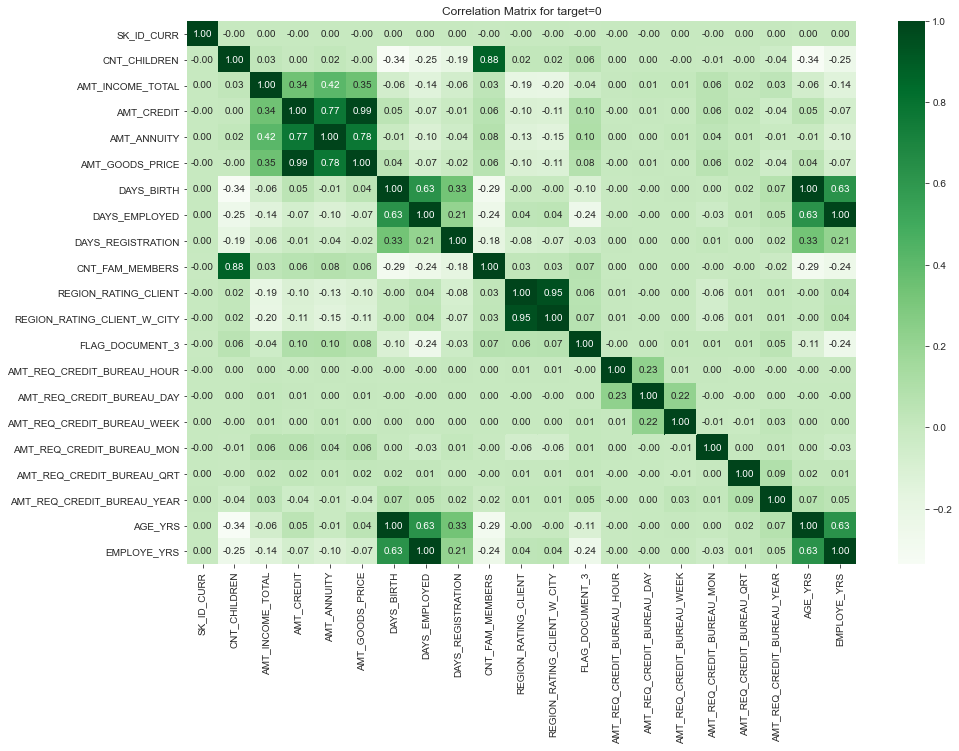

In [113]:
corr_plots(df=corr0,title='Correlation Matrix for target=0')

###### As we can see from above correlation heatmap, There are number of observation we can point out

Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
less children client have in densely populated area.
Credit amount is higher to densely populated area.
The income is also higher in densely populated area.

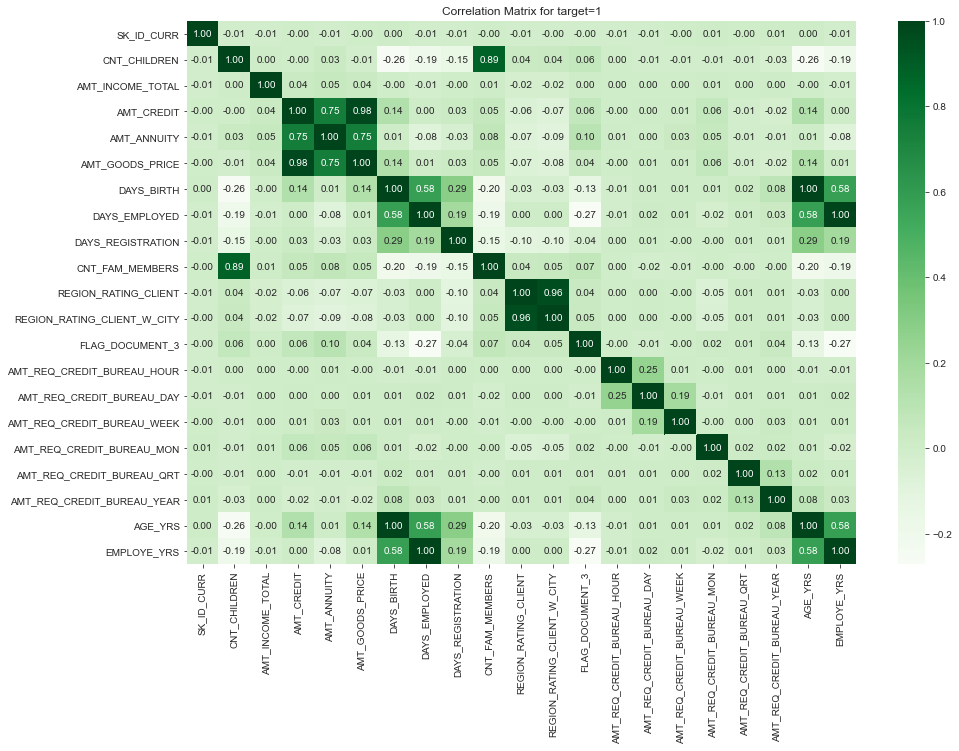

In [114]:
corr_plots(df=corr1,title='Correlation Matrix for target=1')

###### This heat map for Target 1 is also having quite a same observation just like Target 0. But for few points are different. They are listed below.

The client's permanent address does not match contact address are having less children and vice-versa
the client's permanent address does not match work address are having less children and vice-versa


<h2> Reading Previous Application Data</h2>

In [130]:
df1=pd.read_csv(r'C:\Users\91701\Documents\Python\EDA_ass_case_study\previous_application.csv')
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [132]:
(df1.isnull().sum()/len(df1)*100).sort_values(ascending=False).head(60)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [133]:
#Using predefined function to drop null value columns  more 50%.
df1=removeNulls(df1,axis=1,percent=0.5)

No of columns dropped  4
Original datset shape: (1670214, 37)
New dataset shape: (1670214, 33)


In [134]:
(df1.isnull().sum()/len(df1)*100).sort_values(ascending=False)

NAME_TYPE_SUITE                49.119754
DAYS_FIRST_DRAWING             40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_APPLICATION                 0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_CURR      

In [135]:
df1.shape

(1670214, 33)

In [136]:
# IMputing values "Unknown" as this a categorical column
df1["NAME_TYPE_SUITE"] = df1["NAME_TYPE_SUITE"].fillna("Unknown")

In [137]:
(df1.isnull().sum()/len(df1)*100).sort_values(ascending=False)

NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_LAST_DUE                  40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_TERMINATION               40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_GOODS_CATEGORY             0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
SK_ID_PREV                      0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_CURR                      0.000000
CODE_REJECT_REASON              0.000000
NAME_PAYMENT_TYPE               0.000000
DAYS_DECISION                   0.000000
NAME_CONTRACT_ST

In [138]:
df1['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [139]:
df1=df1[df1['NAME_CONTRACT_TYPE']!='XNA']

In [140]:
df1.shape

(1669868, 33)

In [141]:
df1['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

Approved        62.087602
Canceled        18.923891
Refused         17.405388
Unused offer     1.583119
Name: NAME_CONTRACT_STATUS, dtype: float64

We have 4 status values, checking the percentage of each category.

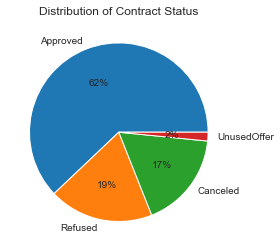

In [142]:
labels=['Approved','Refused','Canceled','UnusedOffer']
colors = sns.color_palette('pastel')
plt.figure(figsize=[4,6])
plt.pie(df1['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100, labels = labels ,autopct='%.0f%%')
plt.title('Distribution of Contract Status')
plt.show()

<h3>Univariate Analysis</h3>

In [143]:
# function to count plot for categorical variables
def uniPlot(var):

    sns.set_style('ticks')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(15,5))
    
    sns.countplot(x=var, data=df1,ax=ax,hue='NAME_CONTRACT_STATUS')
    ax.set_ylabel('Total Counts')
    ax.set_title(f'Distribution of {var}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format((p.get_height()/len(df1))*100), (p.get_x()+0.1, p.get_height()+50),fontsize=13)
        
    
    plt.show()

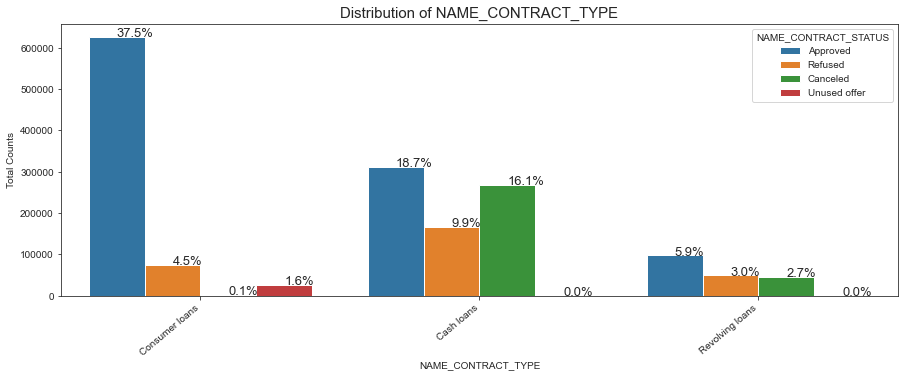

In [144]:
uniPlot('NAME_CONTRACT_TYPE')

<blockquote>1. Consumer loans were opted by large number of people in previous application records. <br>
    2. We can observe for consumer loans we do not have any canceled status,which is good. Also for other two types no unused offer status.

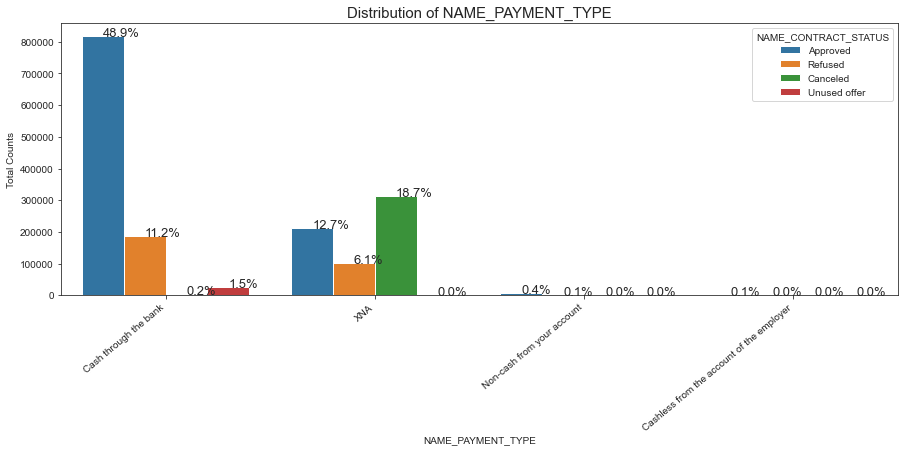

In [145]:
uniPlot('NAME_PAYMENT_TYPE')

<blockquote>1. The  most popular payment method to repay loan amounts is 'cash through bank' option.<br>
    2. Other two methods -'Non-cash from your account' and 'cashless from the account of the employer' are almost null.

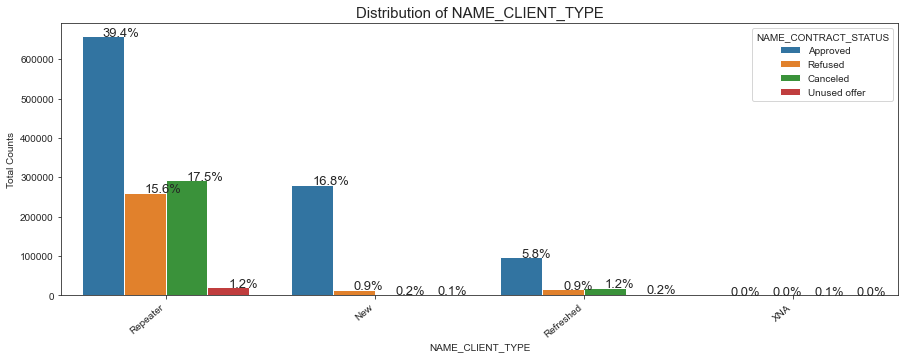

In [146]:
uniPlot('NAME_CLIENT_TYPE')

<blockquote>1. Most of the loan applications are from Repeat customers(around 75%),followed by New ones(19%).<br>
    2. For repeaters the refused percentage is more than other client types, because for them company is aware about their repayment patterns.

In [147]:
df1.shape

(1669868, 33)

In [148]:
#Checking number of unique values for two id columns-SK_ID_PREV and SK_ID_CURR
df1.nunique().head(5)

SK_ID_PREV            1669868
SK_ID_CURR             338857
NAME_CONTRACT_TYPE          3
AMT_ANNUITY            357959
AMT_APPLICATION         93885
dtype: int64

    Length of dataframe is 1669868, but for col-SK_ID_CURR we have only 338857 unique values,which means many record have dupicate sk_id_curr col value. So we will study the data after combining application_data and previous_data on basis of sk_id_curr to get more insights on default rates.

In [149]:
app_train.shape

(307504, 38)

In [150]:
# Now merging the Application dataset with previous appliaction dataset

merge_data=pd.merge(app_train,df1, how='inner',on='SK_ID_CURR')
merge_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [151]:
merge_data.shape

(1413333, 70)

In [152]:
merge_data.info('all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413333 entries, 0 to 1413332
Data columns (total 70 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413333 non-null  int64   
 1   TARGET                       1413333 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413333 non-null  object  
 3   CODE_GENDER                  1413333 non-null  object  
 4   FLAG_OWN_CAR                 1413333 non-null  object  
 5   FLAG_OWN_REALTY              1413333 non-null  object  
 6   CNT_CHILDREN                 1413333 non-null  int64   
 7   AMT_INCOME_TOTAL             1413333 non-null  float64 
 8   AMT_CREDIT_x                 1413333 non-null  float64 
 9   AMT_ANNUITY_x                1413333 non-null  float64 
 10  AMT_GOODS_PRICE_x            1413333 non-null  float64 
 11  NAME_TYPE_SUITE_x            1409810 non-null  object  
 12  NAME_INCOME_TYPE            

In [153]:
# Bisecting the "merge_data" dataframe based on Target value 0 and 1 for correlation and other analysis

d0 = merge_data[merge_data['TARGET']==0] # Repayers
d1 = merge_data[merge_data['TARGET']==1] # Defaulters

In [154]:
d0.shape

(1291036, 70)

In [155]:
d1.shape

(122297, 70)

###### Performing univariate analysis

In [158]:
def uniMergePlot(col,hue=None):

    sns.set_style('ticks')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.countplot(x=col, data=d0,ax=ax1,hue=hue)
    ax1.set_ylabel('Total Counts')
    ax1.set_title(f'Distribution of {col} for Non-Defaulters',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right",fontdict={'fontsize':13,'fontweight':4, 'color':'brown'})
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax1.patches:
        ax1.annotate('{:.1f}'.format((p.get_height()/len(d0))*100), (p.get_x()+0.1, p.get_height()+50),fontsize=10)
        
    sns.countplot(x=col, data=d1,ax=ax2,hue=hue)
    ax2.set_ylabel('Total Counts')
    ax2.set_title(f'Distribution of {col} for Defaulters',fontsize=15)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right",fontdict={'fontsize':13,'fontweight':4, 'color':'brown'})
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax2.patches:
        ax2.annotate('{:.1f}'.format((p.get_height()/len(d1))*100), (p.get_x()+0.1, p.get_height()+50),fontsize=10)
    
    plt.show()

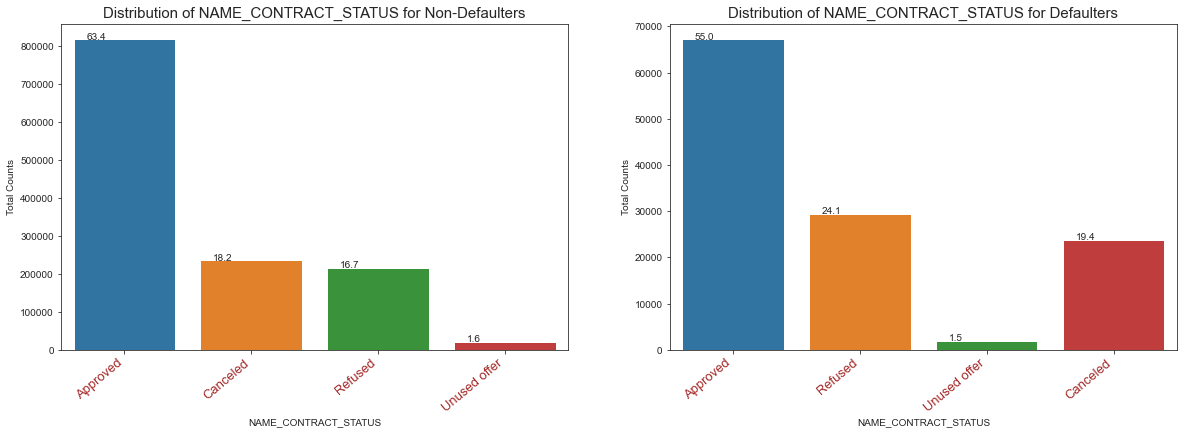

In [159]:
uniMergePlot('NAME_CONTRACT_STATUS')

<blockquote>1. Default percentage is less for people who were approved for loan previously,its 55% as opposed to high 64% for non-defaults.<br>
    2.People whose loan applications were rejected earlier have high chances of defaulting.

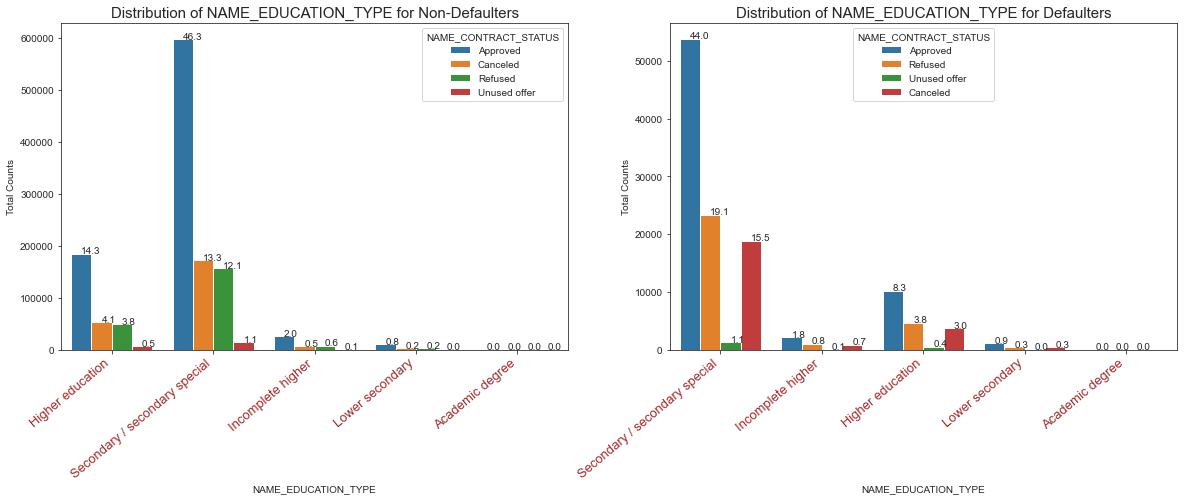

In [160]:
uniMergePlot('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS')    

`<blockquote>1. People tend to make more loans for SECONDARY/SECONDARY SPECIAL category and their loans are moslty approved.

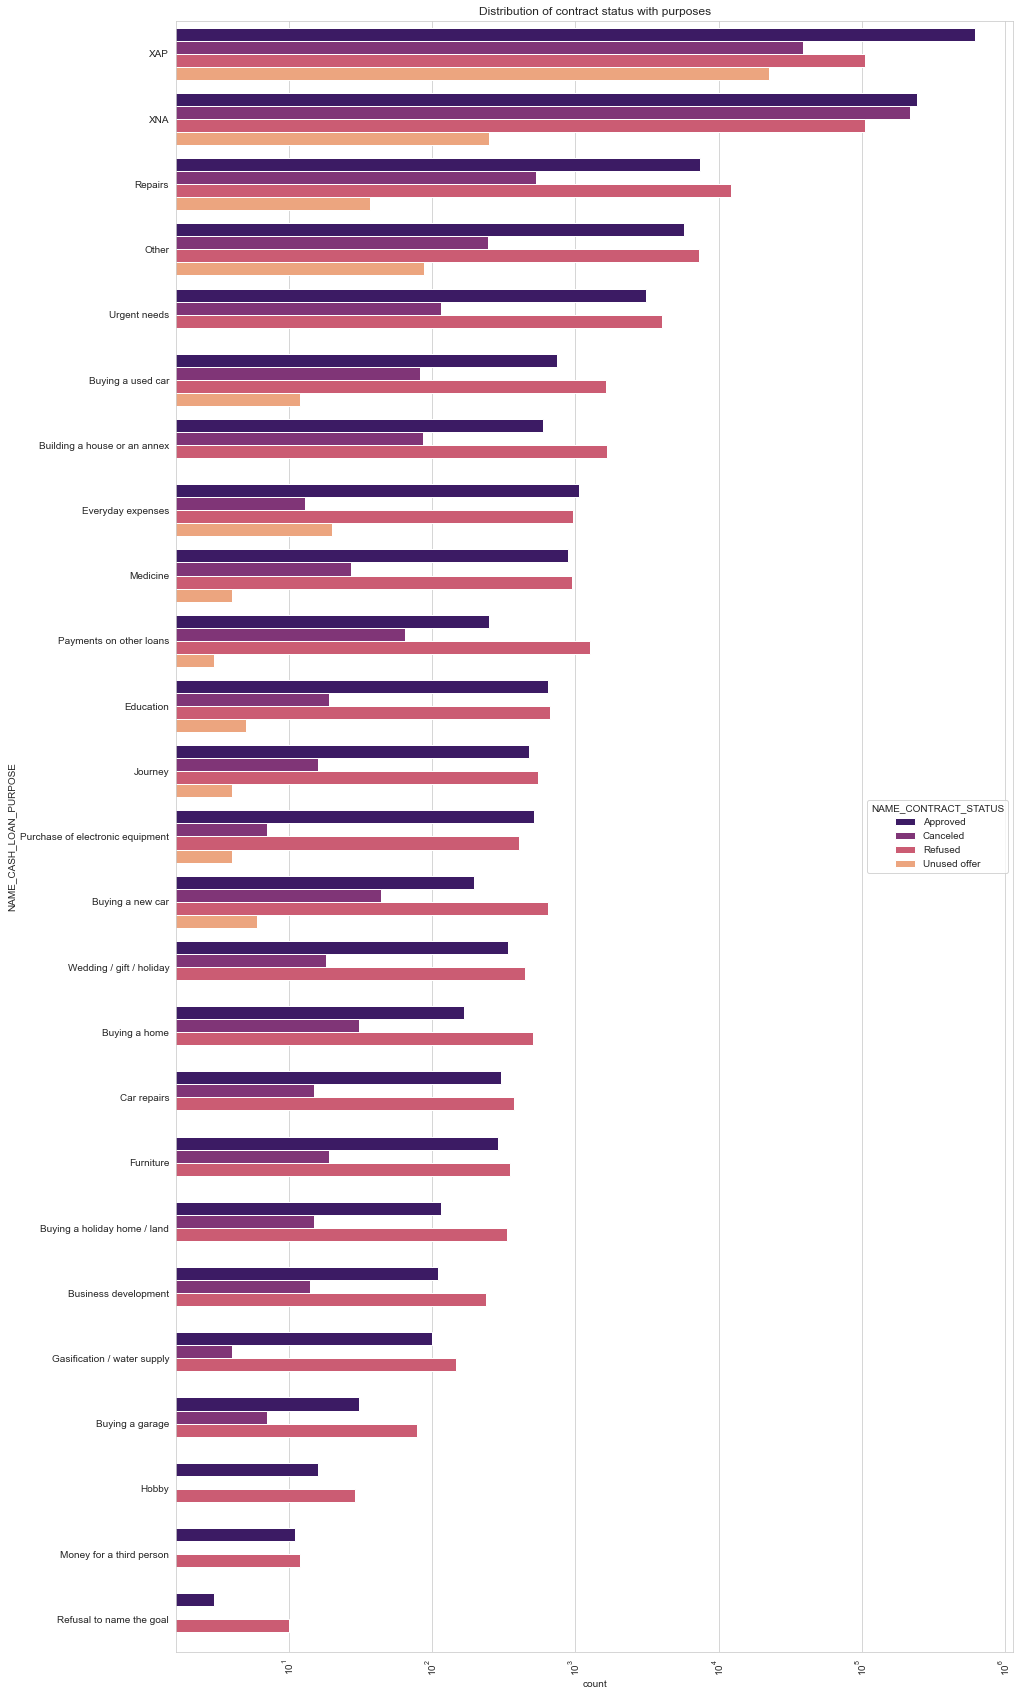

In [156]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')


plt.figure(figsize=(15,30))

plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = merge_data, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merge_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')

###### Points to be concluded from above plot:

Most rejection of loans came from purpose 'repairs'.
For education purposes we have equal number of approves and rejection
Payign other loans and buying a new car is having significant higher rejection than approves.

###### Performing bivariate analysis



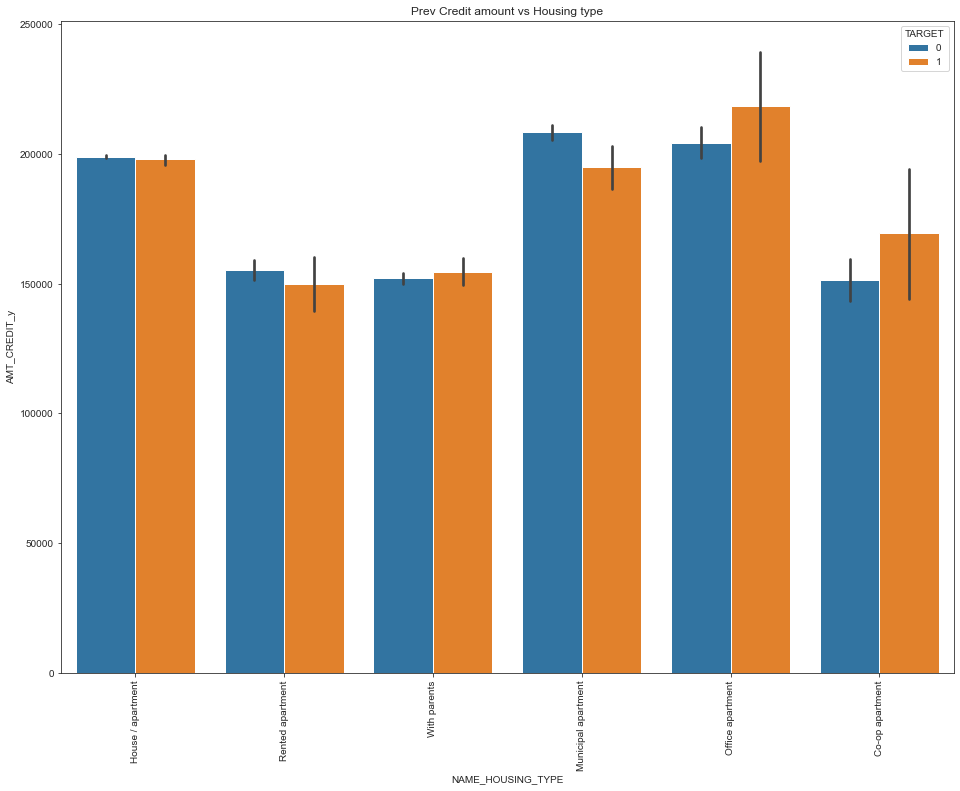

In [163]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =merge_data, y='AMT_CREDIT_y',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

###### Here for Housing type, office appartment is having higher credit of target 1 and municipal apartment is having higher credit of target 1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

# CONCLUSION
1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.

2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.

3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.

4. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.